# Spam classifier : UCI dataset
# Techniques        : Stemming, Lemmatization, BOW & TF-IDF
# Model                 : Naive Bayes

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Reading data, renaming column names :
data = pd.read_csv('SMSSpamCollection',sep='\t',names=["label","message"])
data.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# EDA

In [3]:
data.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [4]:
# we see that there are 5572 rows
# lets find the no. of spam and ham in the dataset
data.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [5]:
# Feature engineering
# lets see more details on the feature
# counting no. of words in each sentence - length of sentence

data['length'] = data['message'].apply(len)
data.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


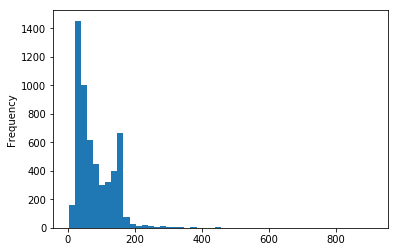

In [6]:
# visualizing the length of words in sentences for better clarity
import matplotlib.pyplot as plt
% matplotlib inline
data['length'].plot(kind='hist',bins=50)
# we see that that length peaks to high values as well

In [7]:
data['length'].describe()
# we see that maximum & minimum count of words in a sentence was 910.

count    5572.000000
mean       80.616296
std        60.015593
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [8]:
# lets try to extract thost messages
# maximum count
data.loc[data['length']==910,'message']

1085    For me the love should start with attraction.i...
Name: message, dtype: object

In [9]:
# minimum count
data.loc[data['length']==2,'message']

1925    Ok
3051    Ok
4498    Ok
5357    Ok
Name: message, dtype: object

In [10]:
# Data cleaning steps :
# Remove all unnecessary characters like punctuations,special characters & numbers.
# Convert all words to lower case so that it doesnt get recognised as a seperate character.
# Split into words.
# Check the words and do stemming process if the word is not in stopwords.
# Finalize the list of words into label "corpus"

In [11]:
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer


In [12]:
ps=PorterStemmer()
corpus=[]
for i in range(0,len(data)) :
    review = re.sub('[^a-zA-Z]',' ',data['message'][i])
    review = review.lower()
    review = review.split()

    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)
 

# Vectorization : BOW

In [14]:
# has 6296 words, however minimizing to 2500 top words used  in the dataset

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2500)
X = cv.fit_transform(corpus).toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [15]:
X.shape

(5572, 2500)

In [16]:
# Analysis of vectorized data, (eg).lets check for the message 3
message4 = data['message'][3]
print("message :",message4)
bow4 = cv.transform([message4])
print(bow4)
print("shape of the matrix is :",bow4.shape)

# This means that there are 2 unique words in message4(Row 623 & Row 1836), out of which 1 word appears twice and 1 word appears once.
# Lets check what those words are :

print("Word which appeared once :",cv.get_feature_names()[623])
print("Word which appeared twice :",cv.get_feature_names()[1836])

('message :', 'U dun say so early hor... U c already then say...')
  (0, 623)	1
  (0, 1836)	2
('shape of the matrix is :', (1, 2500))
('Word which appeared once :', u'dun')
('Word which appeared twice :', u'say')


In [17]:
# Simplifying the putput value - 'label'
# lets take ham as 0 and spam as 1 

y=pd.get_dummies(data['label'])
y=y.iloc[:,1].values
y

array([0, 0, 1, ..., 0, 0, 0], dtype=uint8)

In [18]:
# split data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0)

In [19]:
# modelling
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB().fit(X_train,y_train)

y_pred = model.predict(X_test)

In [20]:
# Confusion matrix:

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[946,   9],
       [  7, 153]], dtype=int64)

In [21]:
# Accuracy:

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9856502242152466

# Vectorization : TF - IDF

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv1 = TfidfVectorizer(max_features=2500)
X1 = cv1.fit_transform(corpus).toarray()

X1.shape

(5572, 2500)

In [23]:
# modelling
from sklearn.model_selection import train_test_split
X1_train,X1_test,y_train,y_test = train_test_split(X1,y,test_size=0.20,random_state=0)
from sklearn.naive_bayes import MultinomialNB
model1 = MultinomialNB().fit(X1_train,y_train)

y_pred = model.predict(X1_test)


In [24]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[953,   2],
       [ 17, 143]], dtype=int64)

In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)


0.9829596412556054

In [26]:
# we see that the accuracy is better with vectorization : Bag of words.
# However here we have followed stemming process for text processing, lets check for any difference in accuracy with lemmatization

# SPAM classifier using lemmatization & BOW

In [27]:
from nltk.stem import WordNetLemmatizer
lm = WordNetLemmatizer()
corpus1 = []
for i in range(0,len(data)) :
    reviewlem = re.sub('[^a-zA-Z]',' ',data['message'][i])
    reviewlem = review.lower()
    reviewlem = review.split()

    reviewlem = [lm.lemmatize(word) for word in reviewlem if not word in set(stopwords.words('english'))]
    reviewlem = ' '.join(reviewlem)
    corpus1.append(reviewlem)

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
cv2 = CountVectorizer(max_features=2500)
X2 = cv2.fit_transform(corpus1).toarray()
X2

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       ...,
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=int64)

In [30]:
# split data
from sklearn.model_selection import train_test_split
X2_train,X2_test,y_train,y_test = train_test_split(X2,y,test_size=0.20,random_state=0)
# modelling
from sklearn.naive_bayes import MultinomialNB
model2 = MultinomialNB().fit(X2_train,y_train)

y_pred = model2.predict(X2_test)

In [31]:
# Confusion matrix
confusion_matrix(y_pred,y_test)

array([[955, 160],
       [  0,   0]], dtype=int64)

In [32]:
# Accuracy score
accuracy_score(y_pred,y_test)

0.8565022421524664

In [ ]:
# The accuracy score through stemming : 98.5%
# The accuracy score through lemmatization : 85.6%